# Pandas demo

This slideshow is a Jupyter notebook with the RISE extension

https://rise.readthedocs.io

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
%matplotlib inline

In [4]:
from matplotlib import pyplot as plt

In [5]:
# better-looking plots
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.figsize'] = (10.0, 7.0)
plt.rcParams['font.size'] = 18

### pandas provides 1D Series, 2D DataFrame

(For higher-dimensionality use a "multi-index")

In [6]:
t = np.arange(0.0, 1.0, 0.1)
s = pd.Series(t)

In [7]:
x = t + np.random.normal(scale=0.1, size=t.shape)
y = x**2 + np.random.normal(scale=0.5, size=t.shape)
df1 = pd.DataFrame({'x': x, 'y': y})

### All pandas objects are indexed

In [8]:
s

0    0.0
1    0.1
2    0.2
3    0.3
4    0.4
5    0.5
6    0.6
7    0.7
8    0.8
9    0.9
dtype: float64

In [9]:
df1

,x,y
0,0.101893,-0.391600
1,0.006418,-0.796162
2,0.152183,0.310873
3,0.132536,1.058722
4,0.419429,-0.396622
5,0.579887,0.648059
6,0.641814,-0.143056
7,0.690472,-0.028227
8,0.928765,1.071219
9,0.704279,0.021353


### Sometimes it makes sense to use another variable as the index

In [10]:
df1 = pd.DataFrame({'x': x, 'y': y}, index=t)
df1

,x,y
0.0,0.101893,-0.391600
0.1,0.006418,-0.796162
0.2,0.152183,0.310873
0.3,0.132536,1.058722
0.4,0.419429,-0.396622
0.5,0.579887,0.648059
0.6,0.641814,-0.143056
0.7,0.690472,-0.028227
0.8,0.928765,1.071219
0.9,0.704279,0.021353


In [11]:
df1 = df1.rename_axis('t')
df1

,x,y
t,,
0.0,0.101893,-0.391600
0.1,0.006418,-0.796162
0.2,0.152183,0.310873
0.3,0.132536,1.058722
0.4,0.419429,-0.396622
0.5,0.579887,0.648059
0.6,0.641814,-0.143056
0.7,0.690472,-0.028227
0.8,0.928765,1.071219


In [12]:
df1 = df1.rename_axis('vars', axis='columns')
df1

vars,x,y
t,,
0.0,0.101893,-0.391600
0.1,0.006418,-0.796162
0.2,0.152183,0.310873
0.3,0.132536,1.058722
0.4,0.419429,-0.396622
0.5,0.579887,0.648059
0.6,0.641814,-0.143056
0.7,0.690472,-0.028227
0.8,0.928765,1.071219


In [13]:
df1 = pd.DataFrame({'t': t, 'x': x, 'y': y})
df1 = df1.set_index('t')
df1 = df1.rename_axis('vars', axis='columns')
df1

vars,x,y
t,,
0.0,0.101893,-0.391600
0.1,0.006418,-0.796162
0.2,0.152183,0.310873
0.3,0.132536,1.058722
0.4,0.419429,-0.396622
0.5,0.579887,0.648059
0.6,0.641814,-0.143056
0.7,0.690472,-0.028227
0.8,0.928765,1.071219


Note that most operations on a DataFrame return a new DataFrame, rather than changing the existing one.

This is generally done in a clever way, so it is still efficient.

If you want to make a change to the original, you can use the argument ```inplace=True```.

### Sorting

In [14]:
df1.sort_values('y')

vars,x,y
t,,
0.1,0.006418,-0.796162
0.4,0.419429,-0.396622
0.0,0.101893,-0.391600
0.6,0.641814,-0.143056
0.7,0.690472,-0.028227
0.9,0.704279,0.021353
0.2,0.152183,0.310873
0.5,0.579887,0.648059
0.3,0.132536,1.058722


Use ```.sort_index``` to sort on the index.

### Plot directly from pandas

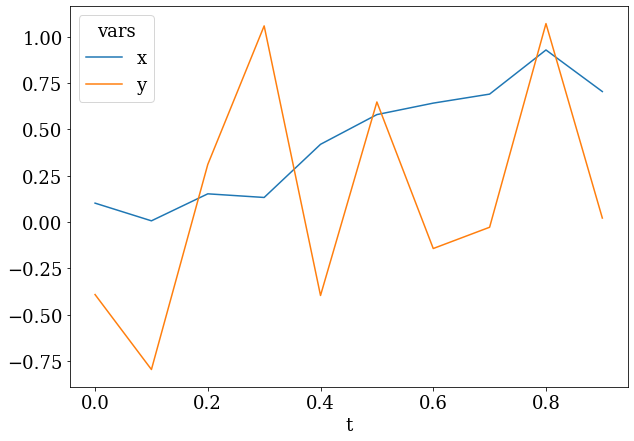

In [15]:
ax = df1.plot()
ax.set_xlabel('t'); 

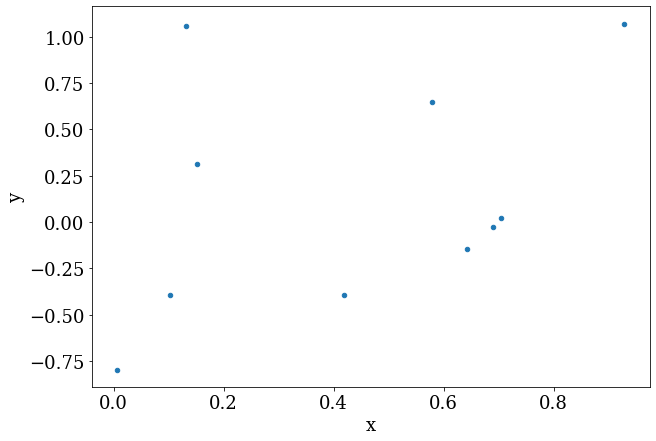

In [16]:
df1.plot('x', 'y', 'scatter');

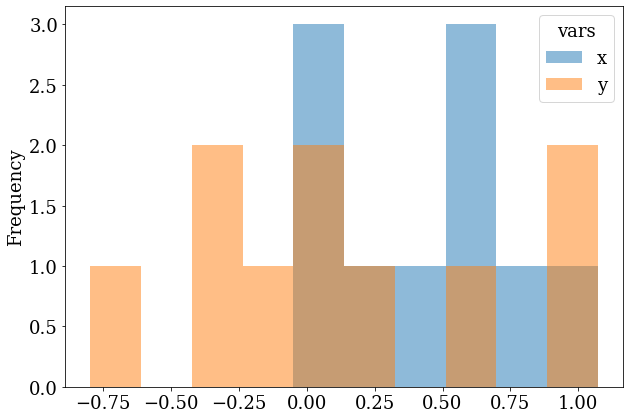

In [17]:
df1.plot(kind='hist', alpha=0.5);

### Accessing data

Get columns by slicing dataframe

In [18]:
df1['x']

t
0.0    0.101893
0.1    0.006418
0.2    0.152183
0.3    0.132536
0.4    0.419429
0.5    0.579887
0.6    0.641814
0.7    0.690472
0.8    0.928765
0.9    0.704279
Name: x, dtype: float64

... or accessing with attribute notation

In [19]:
df1.x

t
0.0    0.101893
0.1    0.006418
0.2    0.152183
0.3    0.132536
0.4    0.419429
0.5    0.579887
0.6    0.641814
0.7    0.690472
0.8    0.928765
0.9    0.704279
Name: x, dtype: float64

Get rows by slicing ```.loc``` using index, or ```.iloc``` using integer position

In [20]:
df1.loc[0.1:0.5]

vars,x,y
t,,
0.1,0.006418,-0.796162
0.2,0.152183,0.310873
0.3,0.132536,1.058722
0.4,0.419429,-0.396622
0.5,0.579887,0.648059


In [21]:
df1.iloc[1:5]

vars,x,y
t,,
0.1,0.006418,-0.796162
0.2,0.152183,0.310873
0.3,0.132536,1.058722
0.4,0.419429,-0.396622


### Joining tables uses the index

In [22]:
t2 = t[::2]
z = t2**3 + np.random.normal(scale=1.0, size=t2.shape)

In [23]:
df2 = pd.DataFrame({'z' :z, 'z2': z**2}, index=t2)
df2

,z,z2
0.0,0.861312,0.741858
0.2,-0.901262,0.812273
0.4,0.773431,0.598196
0.6,-0.770668,0.593930
0.8,1.316918,1.734273


In [24]:
df3 = df1.join(df2)
df3

,x,y,z,z2
t,,,,
0.0,0.101893,-0.391600,0.861312,0.741858
0.1,0.006418,-0.796162,NaN,NaN
0.2,0.152183,0.310873,-0.901262,0.812273
0.3,0.132536,1.058722,NaN,NaN
0.4,0.419429,-0.396622,0.773431,0.598196
0.5,0.579887,0.648059,NaN,NaN
0.6,0.641814,-0.143056,-0.770668,0.593930
0.7,0.690472,-0.028227,NaN,NaN
0.8,0.928765,1.071219,1.316918,1.734273


### Pandas handles missing data intelligently

#### Filling NaNs

In [25]:
df3 = df3.fillna(0)
df3

,x,y,z,z2
t,,,,
0.0,0.101893,-0.391600,0.861312,0.741858
0.1,0.006418,-0.796162,0.000000,0.000000
0.2,0.152183,0.310873,-0.901262,0.812273
0.3,0.132536,1.058722,0.000000,0.000000
0.4,0.419429,-0.396622,0.773431,0.598196
0.5,0.579887,0.648059,0.000000,0.000000
0.6,0.641814,-0.143056,-0.770668,0.593930
0.7,0.690472,-0.028227,0.000000,0.000000
0.8,0.928765,1.071219,1.316918,1.734273


### Binning data and grouped operations

In [26]:
pd.cut(df3.y, 3)

t
0.0    (-0.798, -0.174]
0.1    (-0.798, -0.174]
0.2     (-0.174, 0.449]
0.3      (0.449, 1.071]
0.4    (-0.798, -0.174]
0.5      (0.449, 1.071]
0.6     (-0.174, 0.449]
0.7     (-0.174, 0.449]
0.8      (0.449, 1.071]
0.9     (-0.174, 0.449]
Name: y, dtype: category
Categories (3, interval[float64]): [(-0.798, -0.174] < (-0.174, 0.449] < (0.449, 1.071]]

`np.digitise` and `np.trunc` also useful for defining bins

In [27]:
groups = df3.groupby(pd.cut(df3.y, 3, labels=['low', 'medium', 'high']))

In [28]:
groups.mean()

,x,y,z,z2
y,,,,
low,0.175913,-0.528128,0.544914,0.446685
medium,0.547187,0.040236,-0.417983,0.351551
high,0.547063,0.926000,0.438973,0.578091


In [29]:
bins = [-0.75, 0, 0.75, 1.5]
pd.cut(df3.y, bins)

t
0.0    (-0.75, 0.0]
0.1             NaN
0.2     (0.0, 0.75]
0.3     (0.75, 1.5]
0.4    (-0.75, 0.0]
0.5     (0.0, 0.75]
0.6    (-0.75, 0.0]
0.7    (-0.75, 0.0]
0.8     (0.75, 1.5]
0.9     (0.0, 0.75]
Name: y, dtype: category
Categories (3, interval[float64]): [(-0.75, 0.0] < (0.0, 0.75] < (0.75, 1.5]]

In [30]:
groups = df3.groupby(pd.cut(df3.y, bins))

In [31]:
groups.mean()

,x,y,z,z2
y,,,,
"(-0.75, 0.0]",0.463402,-0.239876,0.216019,0.483496
"(0.0, 0.75]",0.478783,0.326762,-0.300421,0.270758
"(0.75, 1.5]",0.530650,1.064970,0.658459,0.867136


### Reading and writing data

| Data | Reader | Writer |
| --- | --- | --- |
| CSV | read_csv | to_csv |
| JSON | read_json | to_json |
| HTML | read_html | to_html |
| MS Excel | read_excel | to_excel |
| HDF5 Format | read_hdf | to_hdf |
| Python Pickle Format | read_pickle | to_pickle |
| SQL | read_sql | to_sql |


In [32]:
# write dataframe to CSV file
df3.to_csv('test.csv')

# read CSV file back in
newdf = pd.read_csv('test.csv')

#### Read and write astronomical data formats via AstroPy

In [33]:
from astropy.table import Table

In [34]:
t = Table.from_pandas(df3)
t.write('test.fits')
t.write('test.tex')

In [35]:
t = Table.read('test.fits')
newdf = t.to_pandas()

### Lots more functionality ...

* Timeseries (handling dates and times)
    * arguments to `read_*` functions or try `pd.to_datetime`
* Applying functions to columns, rows or groups
    * `pd.transform`, `pd.apply`, ...
* Lots of examples on Stack Overflow, etc.
  * Prefer recent answers
  * Look at official documentation